#### When subjecting your data to machine learning the training is sensitive to the scale of the features. If this is not handled before training two issues may arise: (1) the model performance will suffer, and (2) solving for coefficients is problematic as smaller feature values will be dominated by larger ones.

#### These issues are alieviated by normalizing or standardizing your data. Let's look at _standardizing_.

# But It's _Standard_!

With standardization (aka centering) we are transforming our data such that it is centered around 0, assuming your data's distributiopn is Gaussian. If it is not Gaussian, you can still standardize, but your mileage may vary... We will accomplish this with this simple equation:

$
z = \frac{x_{i} - \mu}{\sigma}
$

From this equation you can see that we need to be able to determine estimates of our training data set's mean, $\mu$, and standard deviation, $\sigma$.

We would consider standardizing our data whenour features have different units (scales), like "Volts" and "Amperes", or "USD" and "kW_used." If we are looking to build a model that were to use these features with different units, we won't be able to compare them without standardizing the data. Models like SVM, logistic regression, and perceptrons (basically, any algorithm that seeks improved performance through Gaussian data) will need to update the estimated weights of the data at similar rates so that your result will be more accurate. This ain't happening if your data is not standardized.

Let's look at how we can do this with a couple different data sets using StandardScaler from SciKit Learn.

In [1]:
# Import what we need
import pandas as pd  # Gimme the data manipulation tools
from sklearn.preprocessing import StandardScaler  # Scaler. Sandard.
# Lemme see what I'm working with
import matplotlib.pyplot as plt
import seaborn as sns

## Example 1

In [2]:
# Bring in the data
df = pd.read_csv('data/housing.csv')

In [3]:
# Looksy
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
# What shape is it?
df.shape

(20640, 10)

In [6]:
# Drop them pesky null values
df = df.dropna()

In [7]:
# What shape is it now?
df.shape

(20433, 10)

In [8]:
# We don't need all this for the example
bedrooms_df = df[['total_bedrooms']]
med_income_df = df[['median_income']]

In [9]:
# Inspect samples of the new dataframes
bedrooms_df.sample(5)

,total_bedrooms
2936,354.0
14318,218.0
13398,488.0
4339,182.0
8884,245.0


In [10]:
med_income_df.sample(5)

,median_income
15818,1.6500
19595,2.1510
11599,6.6312
10406,5.1589
16820,4.6452


In [11]:
# Collect the column names
names = bedrooms_df.columns

In [12]:
# Instantiate the scaler object
scaler = StandardScaler()

In [13]:
# Fit the data on the scaler object
scaled_df = scaler.fit_transform(bedrooms_df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

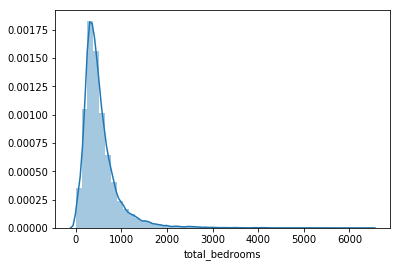

In [14]:
# Check out without standardizing
_ = sns.distplot(df.total_bedrooms)

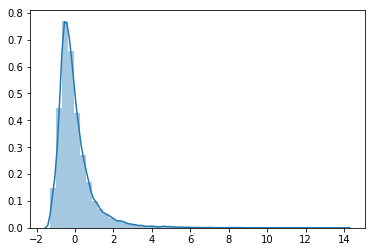

In [15]:
# Now with standardizing, check out the x-axes
_ = sns.distplot(scaled_df)

### One more with the same original dataframe

In [16]:
# Collect the column names
names = med_income_df.columns

In [17]:
# Instantiate the scaler object
scaler = StandardScaler()

In [18]:
# Fit the data on the scaler object
scaled_df = scaler.fit_transform(med_income_df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

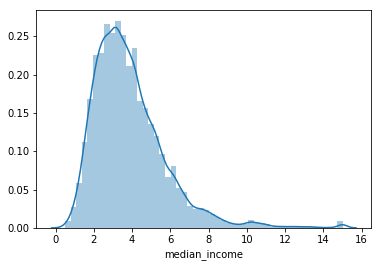

In [19]:
# Check out without standardizing
_ = sns.distplot(df.median_income)

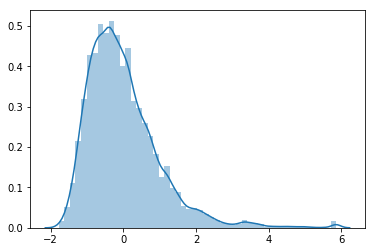

In [20]:
# Now with standardizing, check out the axes
_ = sns.distplot(scaled_df)

So we have adjusted for different units and outliers altogther, plus we have a better Gaussian shape overall. Standardizing our data enables the training portion of model building to be better behaved due to improving the numerical condition required for optimization being improved. For example, if performing PCA, our output will only be correctly interpreted when the features have been centered around their repective means. Be mindful of your data, model and what your expected outcomes are so that you can decide if your data needs to be standardized.

### But wait, there's more!

Before we look at the next example, Mr. DeFilippi presented a neat little bit of information with this dataset that may be useful when looking at similar datasets (as in, those with latitude and longitude data).

Look at the latitude feature in the original dataframe above. What if it has a geographic location withn an area of interest? How could one think about standardizing (or even or normalizing) this? Well, one could do whichever one they wanted to, _but_  there is another option called *binning*.

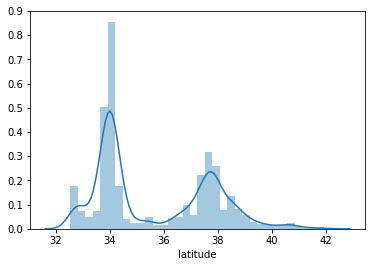

In [21]:
_ = sns.distplot(df.latitude)

Our intention with this approach is to create a new feature for each va;ue of latidue's range, then encode the value with a 0 or a 1, which will represent the relative range that value is within our target location.

In [22]:
# Create the range for the new column
lat_range = zip(range(32, 44), range(33, 45))

In [23]:
# Create the new dataframe
new_df = pd.DataFrame()

In [24]:
# Create the new column while iterating (0 and 1 encoding)
for ran in lat_range:
    new_df['Latitude_%d_to_%d' % ran] = df.latitude.apply(
        lambda l: 1.0 if l >= ran[0] and l < ran[1] else 0.0)

In [25]:
# Let's see what we've done
new_df.head()

,Latitude_32_to_33,Latitude_33_to_34,Latitude_34_to_35,Latitude_35_to_36,Latitude_36_to_37,Latitude_37_to_38,Latitude_38_to_39,Latitude_39_to_40,Latitude_40_to_41,Latitude_41_to_42,Latitude_42_to_43,Latitude_43_to_44
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


This provides a binary value for a location residing in your target area, and we have another means of cleaning your data for modelling.

## Example 2

In [26]:
# Import what we need
from pandas import Series  # Just the series for this one please

In [27]:
# Import the data
series = Series.from_csv('data/daily-minimum-temperatures-in-me.csv', header=0)

/home/cjohn033/miniconda3/envs/py3-learn/lib/python3.5/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [28]:
# Peek at the data
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: object

In [29]:
series.tail()

Date
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: object

In [30]:
# Remove a few pesky values
series = series[~((series == '?0.1') | (series == '?0.2') | (series == '?0.8'))]

In [31]:
# Convert the values to numeric data type so that we can look at the distribution
series = pd.to_numeric(series)

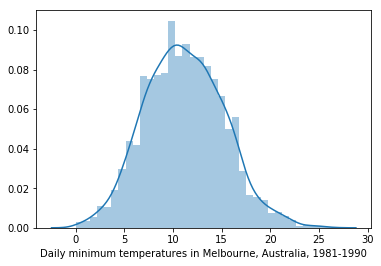

In [32]:
# Look at the distribution
_ = sns.distplot(series)

In [33]:
# One more thing we need here
from math import sqrt

Since SciKit Learn tools prefer 2-D matrices and our data series here is 1-D, we want to reshape the series. We must explicitly state in the Numpy array the number of rows and columns so that SciKit Learn will not throw out a warning (which I do not do below).

In [34]:
# Get the data prepped for standardizing
values = series.values
values = values.reshape((len(values), 1))

In [35]:
# Train and fit the scaler
scaler = StandardScaler()
scaler = scaler.fit(values)

In [36]:
# What have we done?
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 11.186647, StandardDeviation: 4.061114


In [37]:
# Standardize our data
normalized = scaler.transform(values)

In [38]:
# Let's look at the standardized data
for i in range(5):
    print(normalized[i])

[2.34254782]
[1.6530818]
[1.87469588]
[0.84049685]
[1.13598229]


In [39]:
# Apply the inverse transform
inversed = scaler.inverse_transform(normalized)

In [40]:
# And what does it look like after we apply the inverse transform
for i in range(5):
    print(inversed[i])

[20.7]
[17.9]
[18.8]
[14.6]
[15.8]
